PolynomialRegression Case Study
-Predicting running time in the olympic game

Targets:
a: Apply the PolynomialRegression model
b: Find the best order by using Cross-validation
c: Test the PolynomialRegression model
d: Apply Lasso regression(with L1 regularization)
e: Apply Ridge regression(with L2 regularization)
f: Compare the L1 and L2 regularization rules

Step1: Load the olympic data

In [1]:
import numpy as np 
%matplotlib inline
import pylab as plt

data = np.loadtxt('olympic100m.txt', delimiter=',')
x = data[:,1][:,None] 
t = data[:,0][:,None]  
print(x.shape)
print(t.shape)

(27, 1)
(27, 1)


Step2: Rescale the variable.
Since we will apply models with different orders(up to 9), we need to rescale the data to a reasonable range in order to make sure the computation process runs smoothly. At this part, there are several ways to achieve rescalling:
-Function1: Normalization, the formula is given below:
            x' = (x - min(x)) / (max(x) - min(x))
-Function2: Standardization, the formula is given below:
            x' = (x - mean(x)) / std(x)
-Function3: Scaling to unit length, the formula is given below:
            x' = x / ||x|| ( the Euclidean length)
Note: you can do the rescalling on the years(variable y) too!

In [2]:
def rescalling(x):
    return (x - np.mean(x)) / np.std(x)

Text(0, 0.5, 'Years')

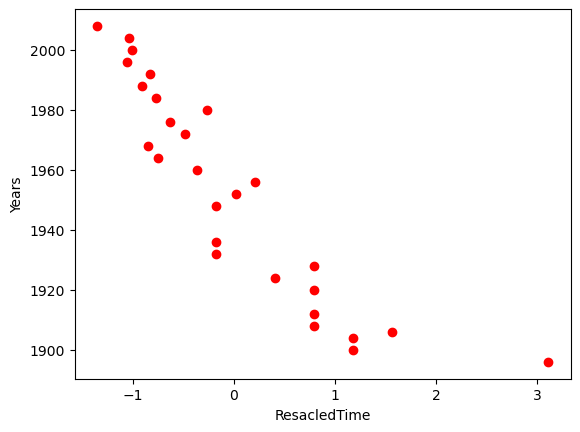

In [3]:
x = rescalling(x)
plt.plot(x, t, 'ro')
plt.xlabel('ResacledTime')
plt.ylabel('Years')

Step3: Construct the polynomical matrix

In [4]:
def construct_poly_matrix(x, order):
    X = np.ones_like(x)
    for i in range(1,order+1):
        X = np.hstack((X,x**i))
    return(X) 

Step4: Find the best order by using Cross-validation

[1598.9534955555566, 355.74195337362494, 123.78078353857669, 179.84279088841035, 355.3302708904042, 183317.0054170663, 186438.15756839508, 24651160.094395045, 240994488378.55054, 24654074178660.773]
10
10


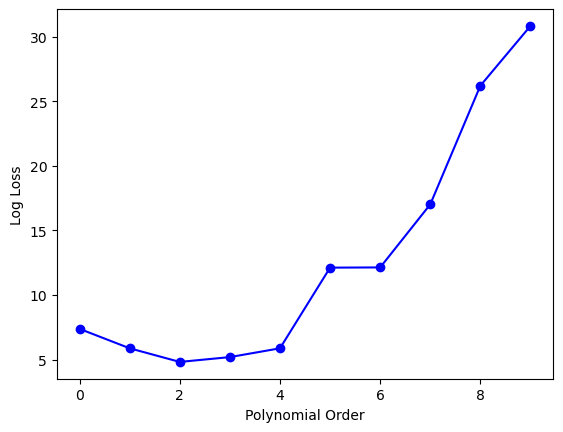

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

cv = KFold(n_splits = 10)
reg = LinearRegression()
loss = []

for i in range(10):
    order = i
    X_train = construct_poly_matrix(x, order)
    loss_at_order = []
    for train_index, test_index in cv.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        t_train_cv, t_test_cv = t[train_index], t[test_index]
        reg.fit(X_train_cv, t_train_cv)
        loss_at_order.append(np.mean(( t_test_cv - reg.predict(X_test_cv) )**2  ))
    loss.append(np.mean(loss_at_order))
plt.plot(np.log(loss), 'bo-') 
plt.xlabel('Polynomial Order') 
plt.ylabel('Log Loss') 
print(loss) # we can see the min loss value is at the order 2
print(len(loss_at_order))
print(len(loss))

In [ ]:
Step5: Apply Ridge regression(with L2 regularization) with new dataset

In [ ]:
# At this time, we generate some new data to test the models. Since the original dataset only contains 27 pairs so we 
# need more inputs.

In [15]:
np.random.seed(1) # fix random seed such that every time we get the same random numbers

N = 100 # total number of data points 
x = 10*np.random.rand(N,1) - 5 # generate random x
t = 5*x**3 - x**2 + x + 200*np.random.randn(N,1) # generate t according to the true model with additive noise

N_independent_test = 50 # total number of independent testing data points 
x_independent_test = 10*np.random.rand(N_independent_test,1) - 5 # generate independent testing x
t_independent_test = 5*x_independent_test**3 - x_independent_test**2 + x_independent_test + 200*np.random.randn(N_independent_test,1) # generate independent testing t with noise

Text(0, 0.5, 'Time (seconds)')

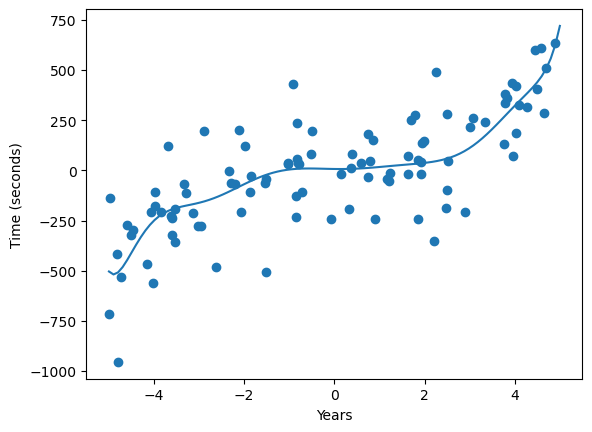

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

poly_order = 10 
X_train = construct_poly_matrix(x, poly_order) # construct polynomial matrix on training data

x_test = np.linspace(-5,5,100)[:,None] # generate x_test for plotting
X_test = construct_poly_matrix(x_test, poly_order) # construct polynomial matrix on x_test

ridge = Ridge() # call ridge model
parameters = {'alpha': np.linspace(1, 10, 20)} # set out search grid for alpha
ridge_model = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5) # Define CV on the search grid to define alpha
ridge_model.fit(X_train, t) # Fit training data

plt.plot(x_test, ridge_model.predict(X_test)) # plot the model
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis

In [ ]:
Step6: Apply Lasso regression(with L1 regularization) with new dataset

Text(0, 0.5, 'Time (seconds)')

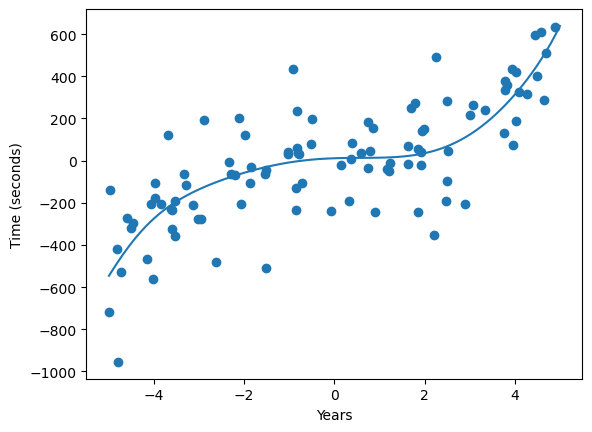

In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


poly_order = 10 
X_train = construct_poly_matrix(x, poly_order) # construct polynomial matrix on training data

x_test = np.linspace(-5,5,100)[:,None] # generate x_test for plotting
X_test = construct_poly_matrix(x_test, poly_order) # construct polynomial matrix on x_test

lasso = Lasso() # call ridge model
parameters = {'alpha': np.linspace(1e-1, 1, 20)} # set out search grid for alpha
lasso_model = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5) # Define CV on the search grid to define alpha
lasso_model.fit(X_train, t) # Fit training data

plt.plot(x_test, lasso_model.predict(X_test)) # plot the model
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis